<a href="https://colab.research.google.com/github/mottasilvia/UCU-NLP/blob/main/PLN_Actividad_1_RedesNeuronales_en_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Resultados de la Clasificación de Reviews de Películas

| Modelo                       | Embeddings          | Accuracy | Negative Precision | Negative Recall | Negative F1-Score | Positive Precision | Positive Recall | Positive F1-Score | Macro Avg Precision | Macro Avg Recall | Macro Avg F1-Score | Weighted Avg Precision | Weighted Avg Recall | Weighted Avg F1-Score |
|------------------------------|---------------------|----------|--------------------|----------------|-------------------|--------------------|----------------|-------------------|----------------------|------------------|---------------------|-------------------------|---------------------|------------------------|
| SimpleRNN                    | Aleatorios          | 0.49     | 0.49               | 0.69           | 0.57              | 0.48               | 0.29           | 0.37              | 0.49                 | 0.49             | 0.47                | 0.49                    | 0.49                | 0.47                   |
| CNN                          | Aleatorios          | 0.78     | 0.79               | 0.77           | 0.78              | 0.77               | 0.79           | 0.78              | 0.78                 | 0.78             | 0.78                | 0.78                    | 0.78                | 0.78                   |
| RNN                          | Preentrenados (es)  | 0.65     | 0.66               | 0.60           | 0.63              | 0.63               | 0.69           | 0.66              | 0.65                 | 0.65             | 0.64                | 0.65                    | 0.65                | 0.64                   |
| RNN                          | Preentrenados (en)  | 0.76     | 0.76               | 0.74           | 0.75              | 0.75               | 0.77           | 0.76              | 0.76                 | 0.76             | 0.75                | 0.76                    | 0.76                | 0.75                   |
| LSTM                         | Preentrenados (es)  | 0.50     | 0.50               | 1.00           | 0.67              | 0.00               | 0.00           | 0.00              | 0.25                 | 0.50             | 0.33                | 0.25                    | 0.50                | 0.33                   |
| LSTM                         | Preentrenados (en)  | 0.50     | 0.00               | 0.00           | 0.00              | 0.50               | 1.00           | 0.67              | 0.25                 | 0.50             | 0.33                | 0.25                    | 0.50                | 0.33                   |
| GRU                          | Preentrenados (es)  | 0.50     | 0.50               | 1.00           | 0.67              | 0.00               | 0.00           | 0.00              | 0.25                 | 0.50             | 0.33                | 0.25                    | 0.50                | 0.33                   |
| GRU                          | Preentrenados (en)  | 0.50     | 0.00               | 0.00           | 0.00              | 0.50               | 1.00           | 0.67              | 0.25                 | 0.50             | 0.33                | 0.25                    | 0.50                | 0.33                   |
| Bidirectional LSTM           | Preentrenados (es)  | 0.48     | 0.47               | 0.47           | 0.48              | 0.47               | 0.47           | 0.48              | 0.47                 | 0.47             | 0.48                | 0.47                    | 0.47                | 0.47                   |
| Bidirectional LSTM           | Preentrenados (en)  | 0.56     | 0.56               | 0.48           | 0.52              | 0.55               | 0.63           | 0.59              | 0.56                 | 0.55             | 0.55                | 0.56                    | 0.56                | 0.55                   |
| LSTM                         | Aleatorios          | 0.50     | 0.50               | 1.00           | 0.67              | 0.00               | 0.00           | 0.00              | 0.25                 | 0.50             | 0.33                | 0.25                    | 0.50                | 0.33                   |

## Conclusiones

1. **Mejor Modelo**:
   - El **CNN con embeddings aleatorios** se destacó como el mejor modelo con una accuracy de 0.78. Este modelo también tuvo buenos valores en todas las métricas de precisión, recall y F1-score.

2. **Influencia de los Embeddings**:
   - Los embeddings preentrenados en inglés mostraron mejor rendimiento que los embeddings preentrenados en español, lo cual es lógico dado que las reviews están en inglés.
   - El uso de embeddings aleatorios fue sorprendentemente efectivo, especialmente en el modelo CNN.

3. **Desempeño de Diferentes Modelos**:
   - Los modelos basados en RNN y LSTM no mejoraron significativamente con los embeddings preentrenados en español debido a la discrepancia idiomática.
   - El modelo Bidirectional LSTM con embeddings preentrenados en inglés mostró un desempeño aceptable, pero no superó al modelo CNN.
   - El modelo LSTM con embeddings aleatorios tuvo una accuracy de 0.50, con los siguientes resultados detallados:
     - **Negative**: Precision: 0.50, Recall: 1.00, F1-Score: 0.67
     - **Positive**: Precision: 0.00, Recall: 0.00, F1-Score: 0.00
     - **Macro Avg**: Precision: 0.25, Recall: 0.50, F1-Score: 0.33
     - **Weighted Avg**: Precision: 0.25, Recall: 0.50, F1-Score: 0.33

Estos resultados destacan la importancia de utilizar embeddings en el idioma adecuado y el potencial de diferentes arquitecturas de redes neuronales en tareas de clasificación de texto.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential # Import Sequential from tensorflow.keras
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN # Import recurrent layers from tensorflow.keras
from tensorflow.keras.layers import Dense, Activation, Dropout # Import core layers from tensorflow.keras
from tensorflow.keras.layers import Embedding # Import Embedding layer from tensorflow.keras
from tensorflow.keras.layers import BatchNormalization # Import BatchNormalization from tensorflow.keras
from tensorflow.keras.utils import to_categorical # Import to_categorical for one-hot encoding
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from tensorflow.keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D # Import additional layers from tensorflow.keras
from tensorflow.keras.preprocessing import sequence, text # Import preprocessing modules from tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping from tensorflow.keras


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.metrics import classification_report

In [2]:
# Verificar la disponibilidad de la GPU
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")


Num GPUs Available:  1
Default GPU Device: /device:GPU:0


In [3]:
# Detect hardware, return appropriate distribution strategy
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

REPLICAS:  1


In [4]:
from google.colab import drive
drive.mount('/content/drive')
carpeta_laboratorios = "/"
path_laboratorios = '/content/drive/My Drive/'
#df = pd.read_csv(path_laboratorios+"Canciones_limpias_finalisismo.csv")

#train = pd.read_csv(path_laboratorios+"train.csv")
#test = pd.read_csv(path_laboratorios+"test.csv")
#validation = pd.read_csv(path_laboratorios+"val.csv")


Mounted at /content/drive


In [5]:
import zipfile
import os

def unzip_to_folder(zip_files, target_dir="unzipped_files"):
  os.makedirs(target_dir, exist_ok=True)

  for zip_file in zip_files:
    filename, _ = os.path.splitext(os.path.basename(zip_file))
    folder_name = target_dir
    os.makedirs(folder_name, exist_ok=True)

    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
      zip_ref.extractall(folder_name)

if __name__ == "__main__":
  # Example usage
  zip_files = ["/content/drive/MyDrive/UCU-TesisFinal/aarchive (3).zip"]
  unzip_to_folder(zip_files, "/content/Movie")


,review,tag
0,alexandre dumas meets hong kong action with ne...,negative
1,this is my first review that i post to this ne...,negative
2,"an 18-foot-high , 43-foot-long dragon is the c...",negative
3,"in double jeopardy , the stakes are high . \nt...",negative
4,when it comes to the average teenage romantic ...,negative
...,...,...
1995,before even seeing a single frame of the film ...,positive
1996,i'll be the first to admit i didn't expect muc...,positive
1997,melvin udall is a heartless man . \nhe spends ...,positive
1998,"the booming introduction music finishes , and ...",positive


                                              review       tag
0  alexandre dumas meets hong kong action with ne...  negative
1  this is my first review that i post to this ne...  negative
2  an 18-foot-high , 43-foot-long dragon is the c...  negative
3  in double jeopardy , the stakes are high . \nt...  negative
4  when it comes to the average teenage romantic ...  negative
Distribución de clases:
tag
negative    1000
positive    1000
Name: count, dtype: int64


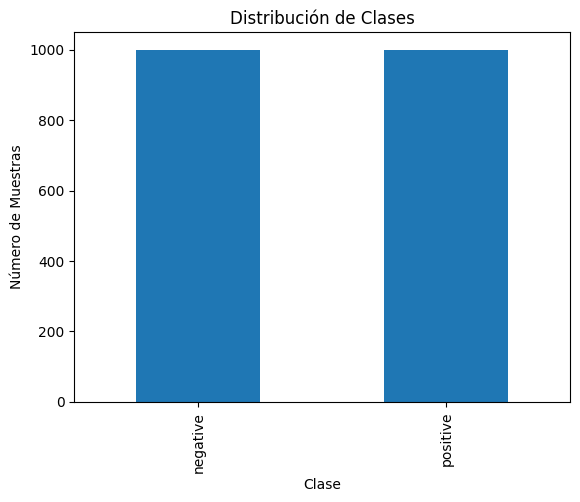

In [6]:
from google.colab import drive
import pandas as pd
import os


# Define los paths a los directorios que contienen las reseñas
neg_dir = '/content/Movie/txt_sentoken/neg'
pos_dir = '/content/Movie/txt_sentoken/pos'

# Función para leer reseñas de un directorio y asignar una etiqueta
def load_reviews_from_directory(directory, tag):
    reviews = []
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            with open(os.path.join(directory, filename), 'r', encoding='utf-8') as file:
                review = file.read()
                reviews.append((review, tag))
    return reviews

# Verificar si los directorios existen
if os.path.exists(neg_dir) and os.path.exists(pos_dir):
    # Cargar reseñas negativas y positivas
    negative_reviews = load_reviews_from_directory(neg_dir, 'negative')
    positive_reviews = load_reviews_from_directory(pos_dir, 'positive')

    # Combinar las reseñas en un único DataFrame
    all_reviews = negative_reviews + positive_reviews
    df = pd.DataFrame(all_reviews, columns=['review', 'tag'])

    # Mostrar el DataFrame
    from IPython.display import display
    display(df)

    # Verificar las primeras filas del DataFrame
    print(df.head())
    # Verificar el balance de clases
    class_counts = df['tag'].value_counts()
    print("Distribución de clases:")
    print(class_counts)

    # Visualización de la distribución de clases
    import matplotlib.pyplot as plt
    class_counts.plot(kind='bar')
    plt.title('Distribución de Clases')
    plt.xlabel('Clase')
    plt.ylabel('Número de Muestras')
    plt.show()

else:
    print("Los directorios especificados no existen. Verifica los paths y vuelve a intentarlo.")


In [7]:
from sklearn.model_selection import train_test_split

# Dividir el DataFrame en train (60%) y temp (40%)
train_df, temp_df = train_test_split(df, test_size=0.4, random_state=42, stratify=df['tag'])

# Dividir el temp_df en validation (50% de 40% -> 20%) y test (50% de 40% -> 20%)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['tag'])

# Mostrar los tamaños de los conjuntos de datos
print(f"Tamaño del conjunto de entrenamiento: {len(train_df)}")
print(f"Tamaño del conjunto de validación: {len(val_df)}")
print(f"Tamaño del conjunto de prueba: {len(test_df)}")

# Mostrar las primeras filas de cada conjunto de datos para verificación
print("Conjunto de entrenamiento:")
print(train_df.head())
# Verificar el balance de clases
class_counts_train = train_df['tag'].value_counts()
print("Distribución de clases de train:")
print(class_counts_train)
print("\nConjunto de validación:")
print(val_df.head())

print("\nConjunto de prueba:")
print(test_df.head())


Tamaño del conjunto de entrenamiento: 1200
Tamaño del conjunto de validación: 400
Tamaño del conjunto de prueba: 400
Conjunto de entrenamiento:
                                                 review       tag
1523  susan granger's review of " the closet " ( mir...  positive
1202  when i left the theater after seeing david lyn...  positive
468    " saving silverman " is a good example of a g...  negative
578   if you're into watching near on two hours of b...  negative
1029   " the end of the affair " is a dark and moody...  positive
Distribución de clases de train:
tag
positive    600
negative    600
Name: count, dtype: int64

Conjunto de validación:
                                                 review       tag
1152  full metal jacket , very much like every other...  positive
1762  available for rental - october 12 , 1999 \n10 ...  positive
1142  i guess there are those who have never been ki...  positive
612   first troy beyer wrote the critically panned "...  negative
202   what

# **Redes Neuronales Recurrentes**

Veamos el máximo de palabras por review para tener una idea luego a la hora de paddear y todas esas cosas.-

In [8]:
max_words_per_review = df['review'].apply(lambda x: len(str(x).split())).max()
max_words_per_review

2678

In [9]:
max_len = 2700 #Si bien el máximo es 2678, ponemos 2700 para tener un poco más de holgura. Se va a usar después para padear!

In [10]:
xtrain = train_df.review.values
xvalid = val_df.review.values
xtest = test_df.review.values
ytrain = train_df.tag.values
yvalid = val_df.tag.values
ytest = test_df.tag.values



In [11]:
xtrain


array(['susan granger\'s review of " the closet " ( miramax films ) \nin this hilarious french farce , a shy , boring accountant ( daniel auteil ) named francois pignon discovers he\'s going to be fired from his job at a condom factory . \nlonely and distraught , he contemplates suicide . \nbut then he runs into belone ( michel aumont ) , an elderly homosexual neighbor , who suggests a " sex discrimination " lawsuit to intimidate management . \nas evidence , belone concocts provocative photographs of pignon locked in a leather-clad embrace with another man and mails them anonymously to pignon\'s boss . \nwhen the racy snapshots start circulating around the factory , not only does pignon get his job back but he suddenly finds himself the focus of attention as an openly gay man . \nhis lusty supervisor ( michele laroque ) is so intrigued that she wonders if , perhaps , she could change his sexual preferences . \neven his ex-wife ( alexandra vandernoot ) and indifferent teenage son ( stan

In [12]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [13]:
# Usando el tokenizer de Keras
tokenizer = Tokenizer(num_words=None)  # Puedes ajustar num_words si deseas limitar el tamaño del vocabulario

# Ajustar el tokenizer a los textos de entrenamiento y validación
tokenizer.fit_on_texts(list(xtrain) + list(xvalid))

# Convertir los textos a secuencias de enteros
xtrain_seq = tokenizer.texts_to_sequences(xtrain)
xvalid_seq = tokenizer.texts_to_sequences(xvalid)
xtest_seq = tokenizer.texts_to_sequences(xtest)

# Aplicar padding a las secuencias
xtrain_pad = pad_sequences(xtrain_seq, maxlen=max_len, padding='post')
xvalid_pad = pad_sequences(xvalid_seq, maxlen=max_len, padding='post')
xtest_pad = pad_sequences(xtest_seq, maxlen=max_len, padding='post')

# Obtener el índice de palabras del tokenizer
word_index = tokenizer.word_index

# Verificar los resultados
print(f"Tokenizador ajustado con {len(word_index)} palabras únicas.")
print(f"Ejemplo de secuencia paddeada (xtrain_pad[0]): {xtrain_pad[0]}")
print(f"Forma de xtrain_pad: {xtrain_pad.shape}")
print(f"Forma de xvalid_pad: {xvalid_pad.shape}")
print(f"Forma de xtest_pad: {xtest_pad.shape}")


Tokenizador ajustado con 39363 palabras únicas.
Ejemplo de secuencia paddeada (xtrain_pad[0]): [3064 5759  471 ...    0    0    0]
Forma de xtrain_pad: (1200, 2700)
Forma de xvalid_pad: (400, 2700)
Forma de xtest_pad: (400, 2700)


In [14]:
xtrain_pad

array([[ 3064,  5759,   471, ...,     0,     0,     0],
       [   44,    18,   339, ...,     0,     0,     0],
       [ 1190,  5011,     6, ...,     0,     0,     0],
       ...,
       [   39,     2,  3809, ...,     0,     0,     0],
       [ 3354,  3154, 13131, ...,     0,     0,     0],
       [   98,   113,     4, ...,     0,     0,     0]], dtype=int32)

In [18]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import numpy as np

# Convertir etiquetas de texto a enteros
label_encoder = LabelEncoder()
ytrain_encoded = label_encoder.fit_transform(ytrain)
yvalid_encoded = label_encoder.transform(yvalid)
ytest_encoded = label_encoder.transform(ytest)

# Convertir los enteros a representación one-hot
ytrain_one_hot = to_categorical(ytrain_encoded)
yvalid_one_hot = to_categorical(yvalid_encoded)
ytest_one_hot = to_categorical(ytest_encoded)

# Verificar las formas de los arrays one-hot
print(f"Forma de ytrain_one_hot: {ytrain_one_hot.shape}")
print(f"Forma de yvalid_one_hot: {yvalid_one_hot.shape}")
print(f"Forma de ytest_one_hot: {ytest_one_hot.shape}")

# Opcional: Verificar los primeros ejemplos de etiquetas one-hot
print("Ejemplo de etiquetas one-hot (ytrain_one_hot[0]):")
print(ytrain_one_hot[0])


Forma de ytrain_one_hot: (1200, 2)
Forma de yvalid_one_hot: (400, 2)
Forma de ytest_one_hot: (400, 2)
Ejemplo de etiquetas one-hot (ytrain_one_hot[0]):
[0. 1.]


En una RNN ingresamos una review palabra por palabra. Representamos cada palabra como un vector utilizando la técnica del one hot encoding. El vector va a tener cantidad de palabras en el vocabulario + 1 domensiones.

Lo que hace keras Tokenizer es, toma todas las palabras únicas en el corpus, forma un diccionario con palabras como claves y su número de ocurrencias como valores (es el word_index), luego ordena el diccionario en orden descendente de conteos.

Luego asigna a la primer palabra el valor 1, a la segunda el valor 2 y así sucesivamente.

Así que supongamos que la palabra 'que' es la que se repite más en todas las canciones, a esa se le asignará el índice 1 y el vector que representa la palabra 'que' sería un vector one-hot con valor 1 en la posición 1 y resto ceros.

La primera línea del modelo "Sequential()" le dice a Keras que construiremos nuestra red secuencialmente.

Luego, primero agregamos la capa de incrustación. La capa de Embedding que es también una capa de neuronas que toma como entrada el vector one-hot n-ésimo de cada palabra y lo convierte en un vector de 300 dimensiones, nos da el enbeddubg de palabras similar a word2vec. Podríamos haber utilizado word2vec, pero la capa de Embedding aprende durante el entrenamiento para mejorar la forma de embeddear.

A continuación, agregamos 100 unidades LSTM sin ningún dropout ni regularización.

Por último, agregamos 5 neuronas (ya que tenemos 5 posibles clases) con función sigmoidea que toma la salida de las 100 células LSTM (tener en cuenta que tenemos 100 células LSTM, no capas) para predecir los resultados y luego compilamos el modelo usando adam optimizer


# RNNs

In [ ]:
%%time
with strategy.scope():
    # A simpleRNN without any pretrained embeddings and one dense layer
    model = Sequential()
    model.add(Embedding(len(word_index) + 1,#Cantidad de palabras distintas del corpus
                     300,#tamaño del vector con el que va a encodear cada palabra (del 1-hot lo pasa a un vector de 300 dimensiones)
                     input_length=max_len)) #El máximo de palabras que puede tener una review.
    model.add(SimpleRNN(100))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 2700, 300)         11829000  
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 100)               40100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 20)                1020      
                                                                 
 dense_5 (Dense)             (None, 2)                 42        
                                                                 
Total params: 11875212 (45.30 MB)
Trainable params: 11875212 (45.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
CPU times: u

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

# Entrenar el modelo
model.fit(xtrain_pad, ytrain_one_hot, epochs=20, batch_size=64, validation_data=(xvalid_pad, yvalid_one_hot))

# Predecir en el conjunto de validación
preds = np.argmax(model.predict(xvalid_pad), axis=-1)

# Calcular la precisión
accuracy = metrics.accuracy_score(yvalid_encoded, preds)
print(f"Accuracy: {accuracy}")

# Generar el reporte de clasificación
target_names = label_encoder.classes_  # Esto debería ser ['negative', 'positive']
clas_report = classification_report(yvalid_encoded, preds, target_names=target_names)
print(clas_report)


Epoch 1/20
19/19 [==============================] - 111s 6s/step - loss: 0.7034 - accuracy: 0.4900 - val_loss: 0.6932 - val_accuracy: 0.5400
Epoch 2/20
19/19 [==============================] - 96s 5s/step - loss: 0.7021 - accuracy: 0.4858 - val_loss: 0.6980 - val_accuracy: 0.5000
Epoch 3/20
19/19 [==============================] - 122s 6s/step - loss: 0.6953 - accuracy: 0.5292 - val_loss: 0.7042 - val_accuracy: 0.5075
Epoch 4/20
19/19 [==============================] - 103s 5s/step - loss: 0.7001 - accuracy: 0.4942 - val_loss: 0.7030 - val_accuracy: 0.4725
Epoch 5/20
19/19 [==============================] - 104s 6s/step - loss: 0.6977 - accuracy: 0.4858 - val_loss: 0.7011 - val_accuracy: 0.5050
Epoch 6/20
19/19 [==============================] - 104s 5s/step - loss: 0.7002 - accuracy: 0.4908 - val_loss: 0.6988 - val_accuracy: 0.4700
Epoch 7/20
19/19 [==============================] - 107s 6s/step - loss: 0.7018 - accuracy: 0.4858 - val_loss: 0.6940 - val_accuracy: 0.5125
Epoch 8/20
19/

# Convolutional

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn import metrics
from sklearn.metrics import classification_report

# Crear el modelo CNN
model = Sequential()
model.add(Embedding(len(word_index) + 1, 300, input_length=max_len))
model.add(Conv1D(128, 5, activation="relu"))
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 5, activation="relu"))
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 5, activation="relu"))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # Ajustar el número de unidades a 2

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

# Entrenar el modelo
model.fit(xtrain_pad, ytrain_one_hot, epochs=20, batch_size=64, validation_data=(xvalid_pad, yvalid_one_hot))

# Predecir en el conjunto de validación
preds = np.argmax(model.predict(xvalid_pad), axis=-1)

# Calcular la precisión
accuracy = metrics.accuracy_score(yvalid_encoded, preds)
print(f"Accuracy: {accuracy}")

# Generar el reporte de clasificación
target_names = label_encoder.classes_  # Esto debería ser ['negative', 'positive']
clas_report = classification_report(yvalid_encoded, preds, target_names=target_names)
print(clas_report)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 2700, 300)         11829000  
                                                                 
 conv1d (Conv1D)             (None, 2696, 128)         192128    
                                                                 
 max_pooling1d (MaxPooling1  (None, 539, 128)          0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 535, 128)          82048     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 107, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 103, 128)         

In [ ]:
!wget -O /content/drive/MyDrive/pretrainedwordvectorsforspanish/cc.es.300.vec.gz https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.es.300.vec.gz


--2024-07-02 22:44:54--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.es.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.156.133.37, 108.156.133.4, 108.156.133.117, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.156.133.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1285580896 (1.2G) [binary/octet-stream]
Saving to: ‘/content/drive/MyDrive/pretrainedwordvectorsforspanish/cc.es.300.vec.gz’

/content/drive/MyDr 100%[===================>]   1.20G  23.7MB/s    in 53s     

2024-07-02 22:45:48 (23.0 MB/s) - ‘/content/drive/MyDrive/pretrainedwordvectorsforspanish/cc.es.300.vec.gz’ saved [1285580896/1285580896]



Paso 1: Descargar Embeddings de GloVe en Inglés

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip -P /content/
!unzip /content/glove.6B.zip -d /content/


--2024-07-04 11:29:05--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-07-04 11:29:06--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-07-04 11:29:06--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘/content/glove.6B.z

In [ ]:
import os
import numpy as np
import pandas as pd

# Ruta al archivo de embeddings de GloVe
glove_file = '/content/glove.6B.300d.txt'

# Verificar si el archivo existe en la ruta especificada
if os.path.exists(glove_file):
    print("El archivo se ha encontrado correctamente.")

    # Cargar los embeddings de GloVe
    def cargar_embeddings(file_path):
        embeddings_index = {}
        with open(file_path, encoding="utf8") as f:
            for line in f:
                values = line.split()
                word = values[0]
                coefs = np.asarray(values[1:], dtype='float32')
                embeddings_index[word] = coefs
        return embeddings_index

    wordvectors = cargar_embeddings(glove_file)  # Definimos wordvectors aquí
    print("Embeddings de GloVe cargados exitosamente.")
else:
    print("El archivo no se encuentra en la ruta especificada.")

# Crear una matriz de embeddings
embedding_dim = 300
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = wordvectors.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    else:
        embedding_matrix[i] = np.random.normal(0, np.sqrt(0.25), embedding_dim)

print("Matriz de embeddings creada exitosamente.")


El archivo se ha encontrado correctamente.
Embeddings de GloVe cargados exitosamente.
Matriz de embeddings creada exitosamente.


In [ ]:
word = "movie"
if word in wordvectors:
    vector = wordvectors[word]
    print(f"Vector for '{word}': {vector}")
else:
    print(f"'{word}' not found in word vectors")


Vector for 'movie': [-0.138     -0.12203    0.0054643 -0.010215   0.13134    0.28616
 -0.36436   -0.035735  -0.17218   -0.38864    0.58637    0.13189
 -0.1513     0.35515   -0.34298   -0.54394   -0.40302   -0.17129
  0.19899    0.24317    0.21332    0.60335    0.22556    0.46382
  0.064101   0.36409    0.25328   -0.79771    0.26771    0.42462
 -0.62075    0.31208   -0.25316    0.13562   -1.1323     0.0099104
 -0.62471   -0.048047   0.23139    0.16102    0.24774   -0.26149
 -0.17341    0.34005    0.21511   -0.26714    0.45698   -0.13671
  0.11654   -0.12222    0.062068  -0.45585   -0.30115    0.11208
  0.31146   -0.048065   0.10067    0.1441     0.27139   -0.17809
 -0.41069    0.093994   0.499      0.023845   0.42438   -0.027703
  0.044485  -0.15928    0.45054    0.13142    0.19913    0.36483
  0.26074    0.55475    0.47258   -0.43104    0.23181   -0.177
  0.21771   -0.37325   -0.15304   -0.45237    0.68007   -0.15976
 -0.094521   0.6455     0.10443   -0.19616    0.027374  -0.24713
 -0.

In [ ]:
# Crear un DataFrame para visualizar la matriz de embeddings
# Seleccionar las primeras 10 filas para visualizar
embedding_df = pd.DataFrame(embedding_matrix[:10], columns=[f"dim_{i}" for i in range(embedding_dim)])
print(embedding_df)

      dim_0     dim_1     dim_2    dim_3     dim_4     dim_5     dim_6  \
0  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
1  0.046560  0.213180 -0.007436 -0.45854 -0.035639  0.236430 -0.288360   
2 -0.297120  0.094049 -0.096662 -0.34400 -0.184830 -0.123290 -0.116560   
3  0.038466 -0.039792  0.082747 -0.38923 -0.214310  0.170200 -0.025657   
4 -0.076947 -0.021211  0.212710 -0.72232 -0.139880 -0.122340 -0.175210   
5 -0.257560 -0.057132 -0.671900 -0.38082 -0.364210 -0.082155 -0.010955   
6 -0.174900  0.229560  0.249240 -0.20512 -0.122940  0.021297 -0.238150   
7 -0.443990  0.128170 -0.252470 -0.18582 -0.166140  0.259090 -0.226780   
8 -0.182560  0.498510 -0.163900 -0.17443 -0.163820 -0.044109  0.279570   
9  0.033284 -0.040754 -0.048377  0.12017 -0.139150 -0.176940 -0.062908   

      dim_7     dim_8   dim_9  ...   dim_290   dim_291   dim_292   dim_293  \
0  0.000000  0.000000  0.0000  ...  0.000000  0.000000  0.000000  0.000000   
1  0.215210 -0.134860 -1.6413

In [ ]:
import pandas as pd

# Crear un DataFrame para visualizar la matriz de embeddings
# Seleccionar las primeras 10 palabras para visualizar
palabras = list(word_index.keys())[:10]
vectores = embedding_matrix[:10]

# Crear un DataFrame
embedding_df = pd.DataFrame(vectores, index=palabras, columns=[f"dim_{i}" for i in range(embedding_dim)])
print(embedding_df)


         dim_0     dim_1     dim_2    dim_3     dim_4     dim_5     dim_6  \
the   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
a     0.046560  0.213180 -0.007436 -0.45854 -0.035639  0.236430 -0.288360   
and  -0.297120  0.094049 -0.096662 -0.34400 -0.184830 -0.123290 -0.116560   
of    0.038466 -0.039792  0.082747 -0.38923 -0.214310  0.170200 -0.025657   
to   -0.076947 -0.021211  0.212710 -0.72232 -0.139880 -0.122340 -0.175210   
is   -0.257560 -0.057132 -0.671900 -0.38082 -0.364210 -0.082155 -0.010955   
in   -0.174900  0.229560  0.249240 -0.20512 -0.122940  0.021297 -0.238150   
that -0.443990  0.128170 -0.252470 -0.18582 -0.166140  0.259090 -0.226780   
it   -0.182560  0.498510 -0.163900 -0.17443 -0.163820 -0.044109  0.279570   
as    0.033284 -0.040754 -0.048377  0.12017 -0.139150 -0.176940 -0.062908   

         dim_7     dim_8   dim_9  ...   dim_290   dim_291   dim_292   dim_293  \
the   0.000000  0.000000  0.0000  ...  0.000000  0.000000  0.000000  0.

In [ ]:
def representar_review_como_vector(review):
    palabras = review.split()
    vectores = np.zeros(300)  # Suponiendo que los embeddings tienen 300 dimensiones
    palabras_encontradas = 0
    for palabra in palabras:
        try:
            vector = wordvectors[palabra]
            vectores = vectores + vector
            palabras_encontradas = palabras_encontradas + 1
        except KeyError:
            print("No está la palabra " + palabra)

    if palabras_encontradas > 0:
        promedio = vectores / palabras_encontradas
    else:
        promedio = vectores
    return vectores, promedio


In [ ]:
review = "The movie was fantastic with great performances"
suma_vectores, promedio_vector = representar_review_como_vector(review)

print("Suma de vectores:", suma_vectores)
print("Promedio de vector:", promedio_vector)


No está la palabra The
Suma de vectores: [ 0.40194301  0.27216901  0.25342232 -1.239327    0.42250501  0.77834221
 -0.89730999 -0.09869419 -0.47823    -6.27481988  1.74771097  0.33666203
 -1.21395398  1.73060001 -0.87205403 -0.28724001 -0.671101    0.55715703
 -0.203493    0.51512298  0.07460097  1.34675997 -0.314656    1.5147994
  0.234901    0.711936   -0.33728396 -1.50191233  0.91382099  1.02284802
 -0.57832701  0.45908001 -2.06607398  0.29664103 -6.47114003 -0.18947361
 -0.69258002  1.90620304  0.79380701  0.29453272 -0.73650301 -1.815127
 -0.50513499  0.32695003  1.19733     1.89346004  1.51674299  1.39860998
  0.424275    0.05463     0.71797101 -0.964288   -0.85394699  0.07967199
  0.10442099  1.65419494  0.45152101  1.69516997  2.07254399 -0.08804101
  0.12355602 -0.11186601  1.61630002 -0.62362401  0.28783797 -0.66621302
  0.72669702 -0.60223998  0.33667501  0.08499102 -0.53619501  0.02752199
 -0.13570798  0.86813002 -0.52545512 -0.67260298  0.98725199  0.81894898
  0.15235002 

In [ ]:
# Seleccionar una review específica para probar
review_ejemplo = train_df[train_df['review'].str.contains('the only problem')]['review'].values[0]

# Obtener los vectores suma y promedio de la review
suma, promedio = representar_review_como_vector(review_ejemplo)


No está la palabra closed-down
No está la palabra don't
No está la palabra couldn't
No está la palabra killer's
No está la palabra identital
No está la palabra you'll
No está la palabra suspeneful


## **Implementamos Doc2Vec**

In [ ]:

problem = train_df[train_df['review'].str.contains('the only problem')]['review'].values[0]
suma, promedio = representar_review_como_vector(problem)
print(suma)


No está la palabra closed-down
No está la palabra don't
No está la palabra couldn't
No está la palabra killer's
No está la palabra identital
No está la palabra you'll
No está la palabra suspeneful
[-4.59138169e+01  4.61852148e+01 -1.83477440e+00 -6.36723800e+01
 -1.25150736e+01  1.23591820e+01 -5.13842206e+01  2.69998580e+01
  3.30345372e+01 -6.88852463e+02  8.27908245e+01  1.32319507e+01
 -3.51826081e+01  6.33438807e+01  4.42306485e+01  2.23102066e+01
 -1.01584576e+02 -4.41097325e+00  1.34701597e+01 -3.19089915e+01
  9.94443619e-02  1.11540788e+02  8.03917519e+01  6.47379369e+01
 -8.04723655e+01  9.81717463e+00  3.01084539e+01 -6.09712993e+01
 -3.40426375e+01  4.76380967e+01 -3.58202230e+00  1.12309295e+02
 -8.40496673e+01  3.88052887e+01 -3.69947138e+02  2.08287777e+01
 -1.40937854e+01  3.79515735e+01 -4.07133025e+01  2.47540927e+01
  2.40702482e+01 -6.90864819e+01 -3.76756686e+01  5.88299646e+01
  3.66336603e+01  3.82451890e+01  6.87086589e+01  6.32599449e+01
 -3.60890346e+01  2.201

In [ ]:
def representar_review_como_vector_promedio(review):
    # Utiliza la función previamente definida para obtener los vectores suma y promedio
    vectores, promedio = representar_review_como_vector(review)
    return promedio


In [ ]:
# Buscar reviews que contienen la frase 'the only problem'
matching_reviews = train_df[train_df['review'].str.contains('the only problem', case=False)]

# Verificar si se encontraron reviews
if matching_reviews.empty:
    print("No se encontraron reviews que contengan la frase 'the only problem'.")
else:
    # Seleccionar la primera review que coincide
    review_ejemplo = matching_reviews['review'].values[0]

    # Obtener el vector promedio de la review
    promedio = representar_review_como_vector_promedio(review_ejemplo)

    # Encontrar las palabras más similares al vector promedio
    print("Palabras similares al vector promedio:")



No está la palabra closed-down
No está la palabra don't
No está la palabra couldn't
No está la palabra killer's
No está la palabra identital
No está la palabra you'll
No está la palabra suspeneful
Palabras similares al vector promedio:


# Red RNN  pero con Embeddings preentrenado

In [ ]:
%%time
with strategy.scope():
    # A simpleRNN without any pretrained embeddings and one dense layer
    model = Sequential()
    model.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))
    model.add(Conv1D(128, 5, activation="relu"))
    model.add(MaxPooling1D(5))
    model.add(Conv1D(128, 5, activation="relu"))
    model.add(MaxPooling1D(5))
    model.add(Conv1D(128, 5, activation="relu"))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(xtrain_pad, ytrain_one_hot, epochs=20, batch_size=64*strategy.num_replicas_in_sync, validation_data=(xvalid_pad,yvalid_one_hot))


Epoch 1/20
19/19 [==============================] - 12s 155ms/step - loss: 0.7298 - accuracy: 0.5150 - val_loss: 0.7024 - val_accuracy: 0.5000
Epoch 2/20
19/19 [==============================] - 1s 62ms/step - loss: 0.6972 - accuracy: 0.5258 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 3/20
19/19 [==============================] - 1s 62ms/step - loss: 0.6971 - accuracy: 0.5083 - val_loss: 0.6895 - val_accuracy: 0.6200
Epoch 4/20
19/19 [==============================] - 1s 62ms/step - loss: 0.6815 - accuracy: 0.5800 - val_loss: 0.6763 - val_accuracy: 0.5875
Epoch 5/20
19/19 [==============================] - 1s 62ms/step - loss: 0.6292 - accuracy: 0.6792 - val_loss: 0.7581 - val_accuracy: 0.5050
Epoch 6/20
19/19 [==============================] - 1s 62ms/step - loss: 0.5196 - accuracy: 0.7533 - val_loss: 0.5454 - val_accuracy: 0.7300
Epoch 7/20
19/19 [==============================] - 1s 64ms/step - loss: 0.3087 - accuracy: 0.8683 - val_loss: 0.5042 - val_accuracy: 0.7750
Epoch 8/20


In [ ]:
# Predecir en el conjunto de validación
preds = np.argmax(model.predict(xvalid_pad), axis=-1)

# Calcular la precisión
accuracy = metrics.accuracy_score(yvalid_encoded, preds)
print(f"Accuracy: {accuracy}")

# Generar el reporte de clasificación
target_names = label_encoder.classes_  # Esto debería ser ['negative', 'positive']
clas_report = classification_report(yvalid_encoded, preds, target_names=target_names)
print(clas_report)

13/13 [==============================] - 2s 11ms/step
Accuracy: 0.755
              precision    recall  f1-score   support

    negative       0.76      0.74      0.75       200
    positive       0.75      0.77      0.76       200

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.75       400
weighted avg       0.76      0.76      0.75       400



# **LSTM**

# LSTM con los embeddings propios del corpus

In [16]:
with strategy.scope():
    model = Sequential()
    model.add(Embedding(len(word_index) + 1,#Cantidad de palabras distintas del corpus
              300,#tamaño del vector con el que va a encodear cada palabra (del 1-hot lo pasa a un vector de 300 dimensiones)
              input_length=max_len)) #El máximo de palabras que puede tener una review. )
    model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3))
    model.add(Dense(2, activation='sigmoid'))  # Cambiado a 2 para clasificación binaria
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2700, 300)         11809200  
                                                                 
 lstm (LSTM)                 (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 2)                 202       
                                                                 
Total params: 11969802 (45.66 MB)
Trainable params: 11969802 (45.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.fit(xtrain_pad, ytrain_one_hot, epochs=20, batch_size=64*strategy.num_replicas_in_sync, validation_data=(xvalid_pad,yvalid_one_hot))

Epoch 1/20
19/19 [==============================] - 259s 13s/step - loss: 0.6944 - accuracy: 0.4950 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/20
19/19 [==============================] - 240s 13s/step - loss: 0.6944 - accuracy: 0.4892 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/20
19/19 [==============================] - 236s 12s/step - loss: 0.6942 - accuracy: 0.4808 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/20
19/19 [==============================] - 239s 13s/step - loss: 0.6939 - accuracy: 0.4992 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/20
19/19 [==============================] - 237s 12s/step - loss: 0.6935 - accuracy: 0.4958 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/20
19/19 [==============================] - 236s 12s/step - loss: 0.6939 - accuracy: 0.5050 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/20
19/19 [==============================] - 242s 13s/step - loss: 0.6934 - accuracy: 0.5017 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 

In [21]:
# Predecir en el conjunto de validación
preds = np.argmax(model.predict(xvalid_pad), axis=-1)

# Calcular la precisión
accuracy = metrics.accuracy_score(yvalid_encoded, preds)
print(f"Accuracy: {accuracy}")

# Generar el reporte de clasificación
target_names = label_encoder.classes_  # Esto debería ser ['negative', 'positive']
clas_report = classification_report(yvalid_encoded, preds, target_names=target_names)
print(clas_report)

13/13 [==============================] - 10s 737ms/step
Accuracy: 0.5
              precision    recall  f1-score   support

    negative       0.50      1.00      0.67       200
    positive       0.00      0.00      0.00       200

    accuracy                           0.50       400
   macro avg       0.25      0.50      0.33       400
weighted avg       0.25      0.50      0.33       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# LSTM con Embeddings preentrenados

In [ ]:
# Definir el modelo
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    model = Sequential()
    model.add(Embedding(input_dim=len(word_index) + 1,
                        output_dim=embedding_dim,
                        weights=[embedding_matrix],
                        input_length=max_len,
                        trainable=False))
    model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3))
    model.add(Dense(2, activation='sigmoid'))  # Cambiado a 2 para clasificación binaria
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 2700, 300)         11809200  
                                                                 
 lstm (LSTM)                 (None, 100)               160400    
                                                                 
 dense_2 (Dense)             (None, 2)                 202       
                                                                 
Total params: 11969802 (45.66 MB)
Trainable params: 160602 (627.35 KB)
Non-trainable params: 11809200 (45.05 MB)
_________________________________________________________________


In [ ]:
model.fit(xtrain_pad, ytrain_one_hot, epochs=20, batch_size=64*strategy.num_replicas_in_sync, validation_data=(xvalid_pad,yvalid_one_hot))

Epoch 1/20
19/19 [==============================] - 261s 14s/step - loss: 0.6934 - accuracy: 0.4917 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/20
19/19 [==============================] - 261s 14s/step - loss: 0.6932 - accuracy: 0.4867 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/20
19/19 [==============================] - 254s 14s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/20
19/19 [==============================] - 252s 13s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/20
19/19 [==============================] - 258s 13s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/20
19/19 [==============================] - 257s 13s/step - loss: 0.6933 - accuracy: 0.4850 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/20
19/19 [==============================] - 257s 14s/step - loss: 0.6932 - accuracy: 0.4675 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 

In [20]:
# Predecir en el conjunto de validación
preds = np.argmax(model.predict(xvalid_pad), axis=-1)

# Calcular la precisión
accuracy = metrics.accuracy_score(yvalid_encoded, preds)
print(f"Accuracy: {accuracy}")

# Generar el reporte de clasificación
target_names = label_encoder.classes_  # Esto debería ser ['negative', 'positive']
clas_report = classification_report(yvalid_encoded, preds, target_names=target_names)
print(clas_report)

13/13 [==============================] - 10s 743ms/step
Accuracy: 0.5
              precision    recall  f1-score   support

    negative       0.50      1.00      0.67       200
    positive       0.00      0.00      0.00       200

    accuracy                           0.50       400
   macro avg       0.25      0.50      0.33       400
weighted avg       0.25      0.50      0.33       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **GRU**

In [ ]:
%%time
with strategy.scope():
    model = Sequential()
    model.add(Embedding(input_dim=len(word_index) + 1,
                        output_dim=embedding_dim,
                        weights=[embedding_matrix],
                        input_length=max_len,
                        trainable=False))
    model.add(SpatialDropout1D(0.3))
    model.add(GRU(300))
    model.add(Dense(2, activation='sigmoid'))  # Cambiado a 2 para clasificación binaria
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 2700, 300)         11809200  
                                                                 
 spatial_dropout1d (Spatial  (None, 2700, 300)         0         
 Dropout1D)                                                      
                                                                 
 gru (GRU)                   (None, 300)               541800    
                                                                 
 dense_3 (Dense)             (None, 2)                 602       
                                                                 
Total params: 12351602 (47.12 MB)
Trainable params: 542402 (2.07 MB)
Non-trainable params: 11809200 (45.05 MB)
_________________________________________________________________
CPU times: user 324 ms, sys: 123 ms, total: 447 ms
Wall time: 447 ms


In [ ]:
model.fit(xtrain_pad, ytrain_one_hot, epochs=20, batch_size=64*strategy.num_replicas_in_sync, validation_data=(xvalid_pad,yvalid_one_hot))

Epoch 1/20
19/19 [==============================] - 9s 321ms/step - loss: 0.6934 - accuracy: 0.4933 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/20
19/19 [==============================] - 6s 302ms/step - loss: 0.6932 - accuracy: 0.4883 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/20
19/19 [==============================] - 6s 339ms/step - loss: 0.6932 - accuracy: 0.4917 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/20
19/19 [==============================] - 6s 339ms/step - loss: 0.6932 - accuracy: 0.4933 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/20
19/19 [==============================] - 6s 304ms/step - loss: 0.6933 - accuracy: 0.4883 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/20
19/19 [==============================] - 6s 338ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/20
19/19 [==============================] - 6s 343ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 

In [ ]:
# Predecir en el conjunto de validación
preds = np.argmax(model.predict(xvalid_pad), axis=-1)

# Calcular la precisión
accuracy = metrics.accuracy_score(yvalid_encoded, preds)
print(f"Accuracy: {accuracy}")

# Generar el reporte de clasificación
target_names = label_encoder.classes_  # Esto debería ser ['negative', 'positive']
clas_report = classification_report(yvalid_encoded, preds, target_names=target_names)
print(clas_report)

13/13 [==============================] - 2s 72ms/step
Accuracy: 0.5
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       200
    positive       0.50      1.00      0.67       200

    accuracy                           0.50       400
   macro avg       0.25      0.50      0.33       400
weighted avg       0.25      0.50      0.33       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **bidirectional LSTM**

In [ ]:

# Definir el modelo bidireccional LSTM
strategy = tf.distribute.MirroredStrategy()


with strategy.scope():
    model = Sequential()
    model.add(Embedding(input_dim=len(word_index) + 1,
                        output_dim=embedding_dim,
                        weights=[embedding_matrix],
                        input_length=max_len,
                        trainable=False))
    model.add(Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3)))
    model.add(Dense(2, activation='sigmoid'))  # Cambiado a 2 para clasificación binaria
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 2700, 300)         11809200  
                                                                 
 bidirectional (Bidirection  (None, 256)               439296    
 al)                                                             
                                                                 
 dense_4 (Dense)             (None, 2)                 514       
                                                                 
Total params: 12249010 (46.73 MB)
Trainable params: 439810 (1.68 MB)
Non-trainable params: 11809200 (45.05 MB)
_________________________________________________________________


In [ ]:
# Definir el callback personalizado
import datetime
class TimeHistory(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_time_start = datetime.datetime.now()
        print(f"Epoch {epoch + 1} start time: {self.epoch_time_start}")

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_time_end = datetime.datetime.now()
        print(f"Epoch {epoch + 1} end time: {self.epoch_time_end}")


EarlyStopping: Añadí el callback EarlyStopping para detener el entrenamiento si la validación no mejora después de 3 épocas, lo cual puede ahorrar tiempo.

In [ ]:
# Reduced batch size
batch_size = 64 * strategy.num_replicas_in_sync
# Crear una instancia de los callbacks
time_callback = TimeHistory()
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Entrenar el modelo con los callbacks
model.fit(xtrain_pad, ytrain_one_hot, epochs=20, batch_size=batch_size, validation_data=(xvalid_pad, yvalid_one_hot), callbacks=[time_callback, early_stopping])

#model.fit(xtrain_pad, ytrain_one_hot, epochs=20, batch_size=batch_size, validation_data=(xvalid_pad, yvalid_one_hot))

Epoch 1 start time: 2024-07-04 13:17:06.315802
Epoch 1/20
19/19 [==============================] - 409s 21s/step - loss: 0.6964 - accuracy: 0.5183 - val_loss: 0.6936 - val_accuracy: 0.5275
Epoch 2 start time: 2024-07-04 13:23:55.116909
Epoch 2/20
19/19 [==============================] - 399s 21s/step - loss: 0.6778 - accuracy: 0.5775 - val_loss: 0.6941 - val_accuracy: 0.5125
Epoch 3 start time: 2024-07-04 13:30:34.471241
Epoch 3/20
19/19 [==============================] - 411s 22s/step - loss: 0.6625 - accuracy: 0.6358 - val_loss: 0.7025 - val_accuracy: 0.5400
Epoch 4 start time: 2024-07-04 13:37:25.843448
Epoch 4/20
19/19 [==============================] - 414s 22s/step - loss: 0.6426 - accuracy: 0.6433 - val_loss: 0.6826 - val_accuracy: 0.5825
Epoch 5 start time: 2024-07-04 13:44:20.188203
Epoch 5/20
19/19 [==============================] - 405s 21s/step - loss: 0.6136 - accuracy: 0.6750 - val_loss: 0.6954 - val_accuracy: 0.5500
Epoch 6 start time: 2024-07-04 13:51:05.072841
Epoch 6/

In [ ]:
13:52
2:05
15 min por epoch

In [ ]:
# Predecir en el conjunto de validación
preds = np.argmax(model.predict(xvalid_pad), axis=-1)

# Calcular la precisión
accuracy = metrics.accuracy_score(yvalid_encoded, preds)
print(f"Accuracy: {accuracy}")

# Generar el reporte de clasificación
target_names = label_encoder.classes_  # Esto debería ser ['negative', 'positive']
clas_report = classification_report(yvalid_encoded, preds, target_names=target_names)
print(clas_report)

13/13 [==============================] - 22s 2s/step
Accuracy: 0.555
              precision    recall  f1-score   support

    negative       0.56      0.48      0.52       200
    positive       0.55      0.63      0.59       200

    accuracy                           0.56       400
   macro avg       0.56      0.55      0.55       400
weighted avg       0.56      0.56      0.55       400



In [ ]:
import datetime
print(datetime.datetime.now())


2024-07-04 11:22:16.004477


In [ ]:
import datetime
print(datetime.datetime.now())

2024-07-04 11:22:16.016657


In [ ]:
def preprocesar_review(review, tokenizer, max_len):
    # Convertir la review en una secuencia de índices
    seq = tokenizer.texts_to_sequences([review])
    # Aplicar padding a la secuencia
    padded_seq = pad_sequences(seq, maxlen=max_len)
    return padded_seq

def clasificar_review(review, model, tokenizer, max_len):
    # Preprocesar la review
    preprocessed_review = preprocesar_review(review, tokenizer, max_len)
    # Hacer la predicción
    pred = model.predict(preprocessed_review)
    # Obtener la clase predicha
    pred_class = (pred > 0.5).astype(int)
    return 'positive' if pred_class[0][0] == 1 else 'negative'

nueva_review = "This movie was incredible, the acting was spectacular and the plot very engaging."
resultado = clasificar_review(nueva_review, model, tokenizer, max_len)
print(f"La review es: {resultado}")


1/1 [==============================] - 1s 1s/step
La review es: positive


In [ ]:
nueva_review = "The Adventure Never Ends is an absolute trainwreck, plagued by a nonsensical plot, painfully bad acting, and horrendous special effects."
resultado = clasificar_review(nueva_review, model, tokenizer, max_len)
print(f"La review es: {resultado}")


1/1 [==============================] - 7s 7s/step
La review es: negative


In [25]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Supongamos que `model` es el modelo CNN ya entrenado
# y `tokenizer` es el tokenizer ajustado en el conjunto de datos de entrenamiento

def preprocesar_review(review, tokenizer, max_len):
    # Convertir la review en una secuencia de índices
    seq = tokenizer.texts_to_sequences([review])
    # Aplicar padding a la secuencia
    padded_seq = pad_sequences(seq, maxlen=max_len)
    return padded_seq

def clasificar_review(review, model, tokenizer, max_len):
    # Preprocesar la review
    preprocessed_review = preprocesar_review(review, tokenizer, max_len)
    # Hacer la predicción
    pred = model.predict(preprocessed_review)
    # Obtener la clase predicha
    pred_class = np.argmax(pred, axis=1)
    return 'positive' if pred_class[0] == 1 else 'negative'

# Ejemplo de uso:
nueva_review = "This movie was incredible, the acting was spectacular and the plot was very involving."
resultado = clasificar_review(nueva_review, model, tokenizer, max_len)
print(f"La review es: {resultado}")


1/1 [==============================] - 1s 886ms/step
La review es: positive


In [24]:
# Ejemplo de uso:
nueva_review = "This movie was pretty awful"
resultado = clasificar_review(nueva_review, model, tokenizer, max_len)
print(f"La review es: {resultado}")


1/1 [==============================] - 2s 2s/step
La review es: negative
